In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_val_results(path):
    results = []
    with open(path) as text:
        for line in text:
            if 'val_acc1' in line:
                i = line.index(':', -25)
                results.append(float(line[i+2:-2]))
    return results

In [3]:
L3eidiv_rs29 = get_val_results('./rs29/3Leidiv_rs29.txt')
L5eidiv_rs29 = get_val_results('./rs29/5Leidiv_rs29.txt')
L7eidiv_rs29 = get_val_results('./rs29/7Leidiv_rs29.txt')
L3_rs29 = get_val_results('./rs29/3L_rs29.txt')
L5_rs29 = get_val_results('./rs29/5L_rs29.txt')
L7_rs29 = get_val_results('./rs29/7L_rs29.txt')

L3eidiv_rs77 = get_val_results('./rs77/3Leidiv_rs77.txt')
L7eidiv_rs77_1_5 = get_val_results('./rs77/7Leidiv_rs77_1_5.txt')
L7eidiv_rs77_5_6 = get_val_results('./rs77/7Leidiv_rs77_5_6.txt')
L7_rs77 = get_val_results('./rs77/7L_rs77.txt')

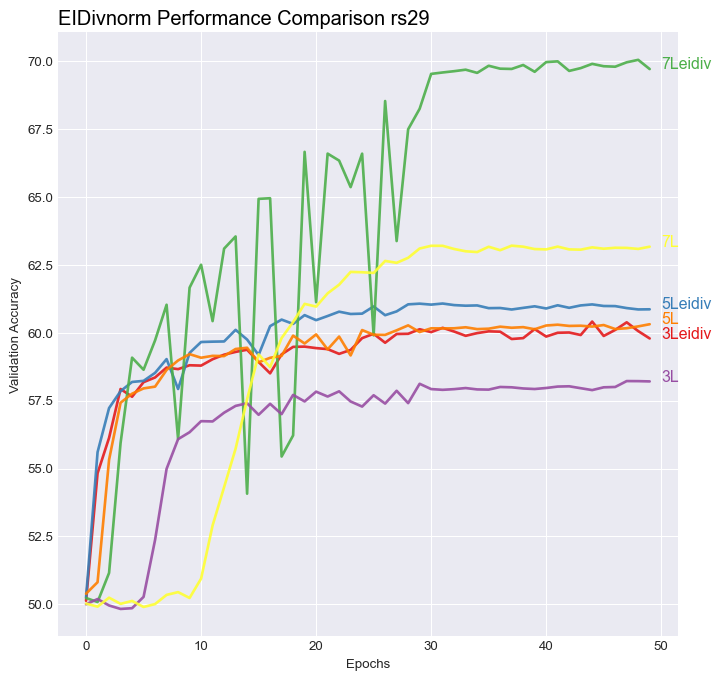

In [4]:
name_list = np.array(['3Leidiv', '5Leidiv', '7Leidiv', '3L', '5L', '7L'])
lines = np.array([np.asarray(L3eidiv_rs29), np.asarray(L5eidiv_rs29), np.asarray(L7eidiv_rs29), 
                np.asarray(L3_rs29), np.asarray(L5_rs29), np.asarray(L7_rs29)])

#setup plot
plt.style.use('seaborn-darkgrid')
dpi = 96
plt.figure(figsize=(800/dpi, 800/dpi), dpi=dpi)
palette = plt.get_cmap('Set1')
#draw lines
for i in range(lines.shape[0]):
    plt.plot(lines[i], marker='', color=palette(i), linewidth=2, alpha=0.9, label=name_list[i])
#mark lines
for i in range(lines.shape[0]):
    plt.text(50, lines[i,-1], name_list[i], horizontalalignment='left', size='large', color=palette(i))

#plt.legend(loc=2, ncol=2)
plt.title("EIDivnorm Performance Comparison rs29", loc='left', fontsize=15, fontweight=0, color='black')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

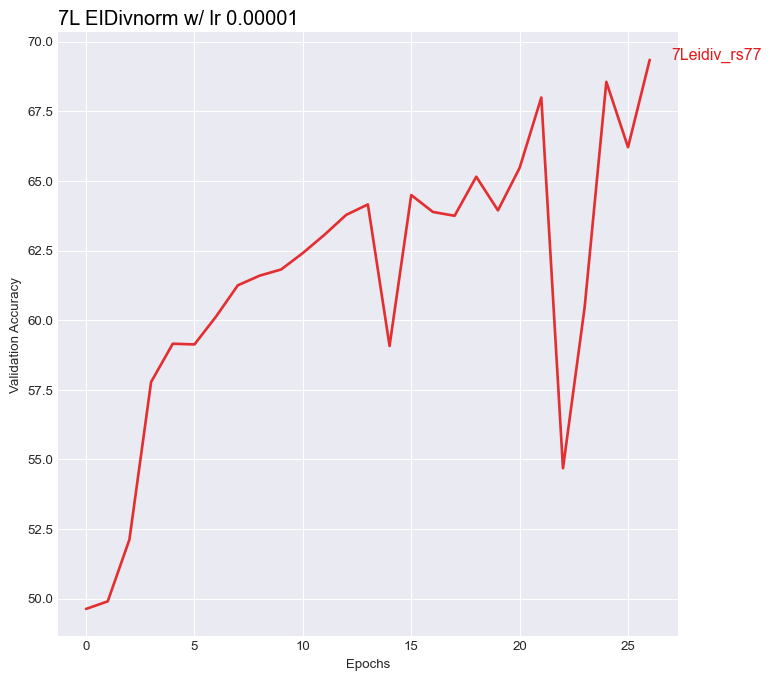

In [5]:
name_list = np.array(['7Leidiv_rs77'])
lines = np.array([np.asarray(L7eidiv_rs77_1_5)])

#setup plot
plt.style.use('seaborn-darkgrid')
dpi = 96
plt.figure(figsize=(800/dpi, 800/dpi), dpi=dpi)
palette = plt.get_cmap('Set1')
#draw lines
for i in range(lines.shape[0]):
    plt.plot(lines[i], marker='', color=palette(i), linewidth=2, alpha=0.9, label=name_list[i])
#mark lines
for i in range(lines.shape[0]):
    plt.text(27, lines[i,-1], name_list[i], horizontalalignment='left', size='large', color=palette(i))

#plt.legend(loc=2, ncol=2)
plt.title("7L EIDivnorm w/ lr 0.00001", loc='left', fontsize=15, fontweight=0, color='black')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

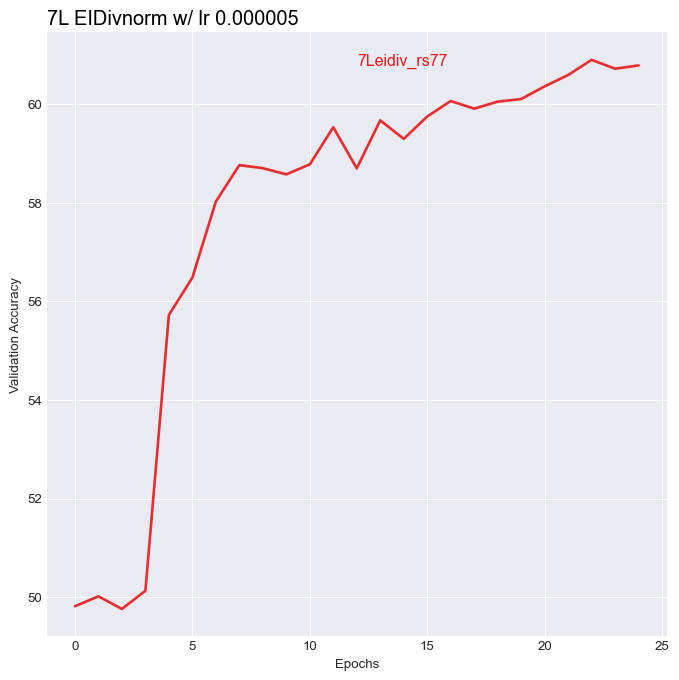

In [6]:
L7eidiv_rs77 = get_val_results('./rs77/7Leidiv_rs77_5_6.txt')

name_list = np.array(['7Leidiv_rs77'])
lines = np.array([np.asarray(L7eidiv_rs77)])

#setup plot
plt.style.use('seaborn-darkgrid')
dpi = 96
plt.figure(figsize=(800/dpi, 800/dpi), dpi=dpi)
palette = plt.get_cmap('Set1')
#draw lines
for i in range(lines.shape[0]):
    plt.plot(lines[i], marker='', color=palette(i), linewidth=2, alpha=0.9, label=name_list[i])
#mark lines
for i in range(lines.shape[0]):
    plt.text(12, lines[i,-1], name_list[i], horizontalalignment='left', size='large', color=palette(i))

#plt.legend(loc=2, ncol=2)
plt.title("7L EIDivnorm w/ lr 0.000005", loc='left', fontsize=15, fontweight=0, color='black')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

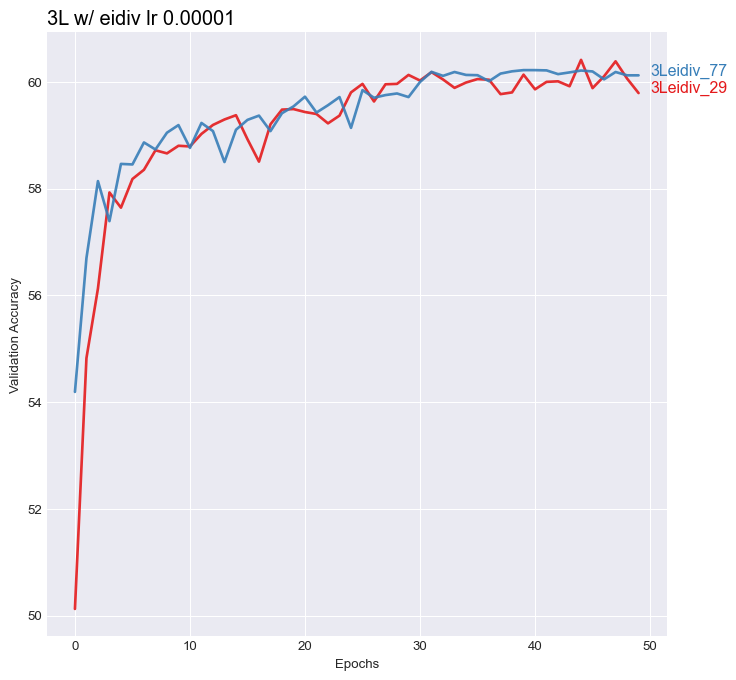

In [7]:
name_list = np.array(['3Leidiv_29', '3Leidiv_77'])
lines = np.array([np.asarray(L3eidiv_rs29), np.asarray(L3eidiv_rs77)])

#setup plot
plt.style.use('seaborn-darkgrid')
dpi = 96
plt.figure(figsize=(800/dpi, 800/dpi), dpi=dpi)
palette = plt.get_cmap('Set1')
#draw lines
for i in range(lines.shape[0]):
    plt.plot(lines[i], marker='', color=palette(i), linewidth=2, alpha=0.9, label=name_list[i])
#mark lines
for i in range(lines.shape[0]):
    plt.text(50, lines[i,-1], name_list[i], horizontalalignment='left', size='large', color=palette(i))

#plt.legend(loc=2, ncol=2)
plt.title("3L w/ eidiv lr 0.00001", loc='left', fontsize=15, fontweight=0, color='black')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

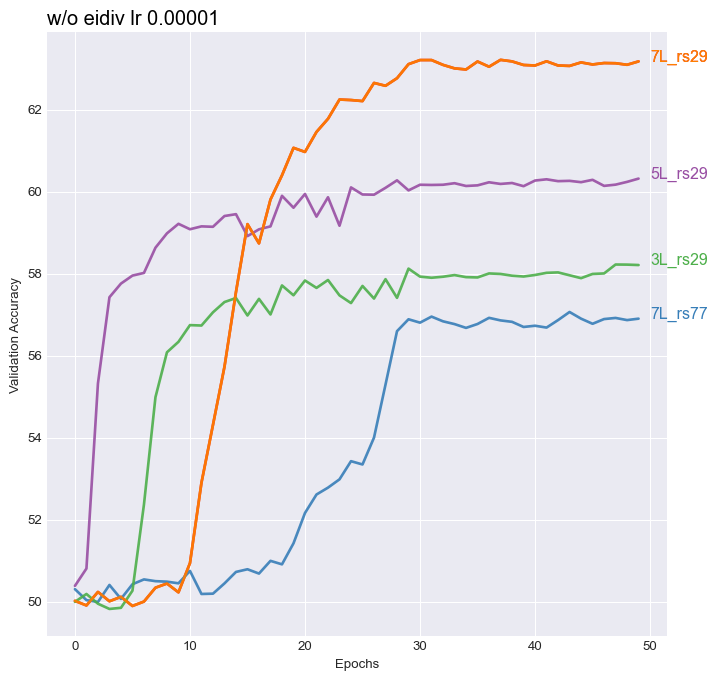

In [8]:
name_list = np.array(['7L_rs29', '7L_rs77', '3L_rs29', '5L_rs29', '7L_rs29'])
lines = np.array([np.asarray(L7_rs29), np.asarray(L7_rs77), np.asarray(L3_rs29), np.asarray(L5_rs29), np.asarray(L7_rs29)])

#setup plot
plt.style.use('seaborn-darkgrid')
dpi = 96
plt.figure(figsize=(800/dpi, 800/dpi), dpi=dpi)
palette = plt.get_cmap('Set1')
#draw lines
for i in range(lines.shape[0]):
    plt.plot(lines[i], marker='', color=palette(i), linewidth=2, alpha=0.9, label=name_list[i])
#mark lines
for i in range(lines.shape[0]):
    plt.text(50, lines[i,-1], name_list[i], horizontalalignment='left', size='large', color=palette(i))

#plt.legend(loc=2, ncol=2)
plt.title("w/o eidiv lr 0.00001", loc='left', fontsize=15, fontweight=0, color='black')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()